Welcome to Daily Expense Tracker Game!
Your budget for the day is ₹1000
Enter your expenses (type 'done' to finish):


Choose category ['Food', 'Travel', 'Shopping', 'Bills', 'Misc']:  Food
Enter amount spent on Food: ₹ 200
Choose category ['Food', 'Travel', 'Shopping', 'Bills', 'Misc']:  Travel
Enter amount spent on Travel: ₹ 300
Choose category ['Food', 'Travel', 'Shopping', 'Bills', 'Misc']:  Shopping
Enter amount spent on Shopping: ₹ 350
Choose category ['Food', 'Travel', 'Shopping', 'Bills', 'Misc']:  Bills
Enter amount spent on Bills: ₹ 100
Choose category ['Food', 'Travel', 'Shopping', 'Bills', 'Misc']:  done



 Well done! You stayed under budget! Balance: 50

 Expenses saved to my_expenses.csv


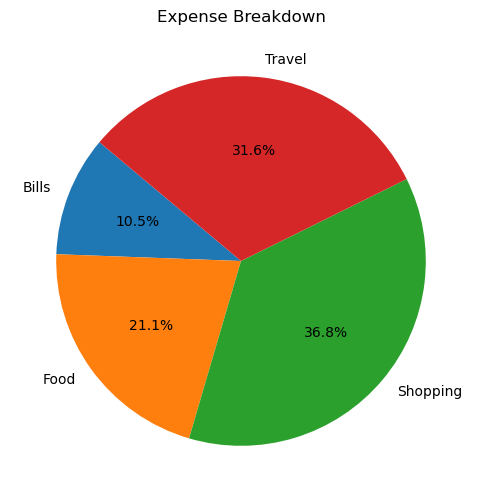

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Daily Budget
categories = ['Food', 'Travel', 'Shopping', 'Bills', 'Misc']
expenses = []
budget = 1000 
total_spent = 0

print("Welcome to Daily Expense Tracker Game!")
print(f"Your budget for the day is ₹{budget}")
print("Enter your expenses (type 'done' to finish):")

# Step 2: Collect user data
while True:
    category = input(f"Choose category {categories}: ").capitalize()
    if category.lower() == 'done':
        break
    if category not in categories:
        print("Invalid category. Try again.")
        continue
    try:
        amount = float(input(f"Enter amount spent on {category}: ₹"))
    except ValueError:
        print("Please enter a valid number.")
        continue
    expenses.append({'Category': category, 'Amount': amount})
    total_spent += amount

# Step 3: Convert to DataFrame
df = pd.DataFrame(expenses)

# Step 4: Group by category
summary = df.groupby('Category').sum().reset_index()

# Step 5: Score Logic
if total_spent <= budget:
    balance = 1000 - int(total_spent)
    print(f"\n Well done! You stayed under budget! Balance: {balance}")
else:
    print(f"\n You overspent by ₹{total_spent - budget}. Try better tomorrow!")

# Step 6: Export Data
df.to_csv("my_expenses.csv", index=False)
print("\n Expenses saved to my_expenses.csv")

# Step 7: Visualization
plt.figure(figsize=(6,6))
plt.pie(summary['Amount'], labels=summary['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Expense Breakdown')
plt.show()